In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

from classicalfield_orig import FiniteTempGPE as gpe 

Trying a higher potential well 


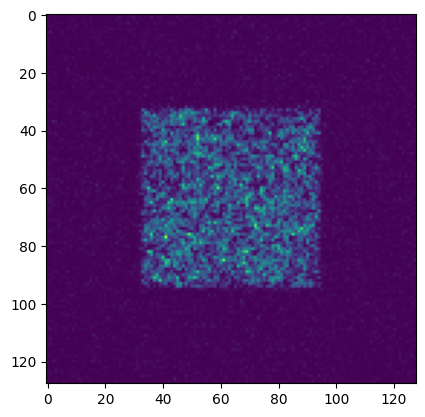

In [169]:
imported_data = np.loadtxt('thinnerboxoutput.csv', dtype = np.complex_)
plt.imshow(np.abs(imported_data)**2)

In [ ]:
# test out to see if the new potential is good 
# originally: 2250000
g = gpe(L = 40, npoints = 2**6, numImagSteps = 2000, numRealSteps = 5478000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'testparams_smallerbox.mp4', Tfact = 1/2, dst = False)



No vortices to be spawned
Total Imag Time:  1.2628495693206787
kmax:  5.026548245743669
T:  6.316546816697189


In [6]:
print(g.gpeobj.dt*5)

0.00041259765625000004


In [168]:
np.savetxt('thinnerboxoutput.csv', g.snaps[-1])

In [3]:
print((1000-686)/g.gpeobj.dt/250)
print(686 + 2600*250*g.gpeobj.dt)
print(1000/g.gpeobj.dt)
print(np.shape(g.snaps))

4115.6608
884.3642578125
3276800.0
(13109, 128, 128)


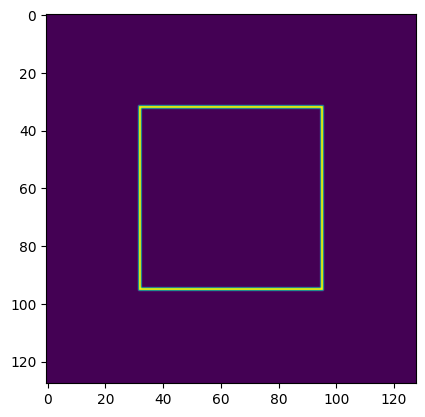

In [7]:
plt.figure() 
plt.imshow(g.gpeobj.Vbox)

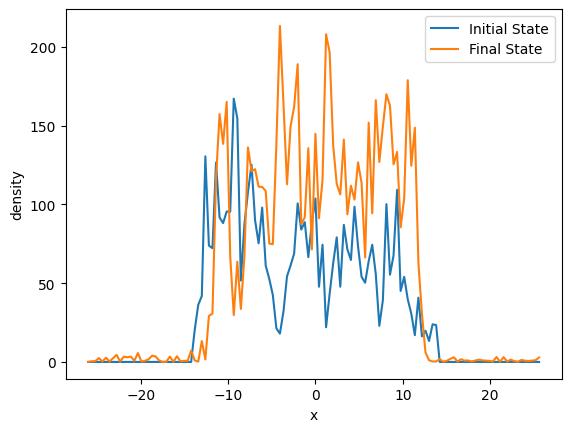

In [7]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2, label = 'Initial State')
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[-1])//2])**2, label = 'Final State')
plt.xlabel('x')
plt.ylabel('density')
plt.legend() 

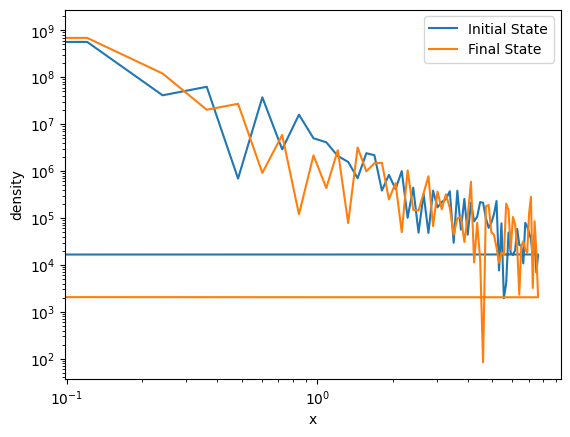

In [8]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2, label = 'Initial State')
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1])[0])**2, label = 'Final State')
plt.xlabel('x')
plt.ylabel('density')
plt.xscale('log')
plt.yscale('log')
plt.legend() 

MISC

In [108]:
# export file 
output = np.savetxt('output.csv', g.snaps[-1])

In [24]:
print(len(g.snaps))

4001


In [107]:
# get the energies and stats

print("Temperature: ", g.T) 
print("Kinetic Energy: ", g.gpeobj.kmax**2/2)
print("Potential Energy: ", np.max(g.gpeobj.Vbox))
print("Interaction Energy: ", g.gpeobj.g*np.max(np.abs(g.gs)**2))
print("Total Time: ", g.numRealSteps*g.gpeobj.dt) 
print("Time Step: ", g.gpeobj.dt)
print("Number of Atoms: ", g.gpeobj.Natoms) 

Temperature:  4.042589962686201
Kinetic Energy:  8.085179925372403
Potential Energy:  7.832554355150511
Interaction Energy:  1.1803369428558095
Total Time:  686.6455078125
Time Step:  0.00030517578125
Number of Atoms:  64000


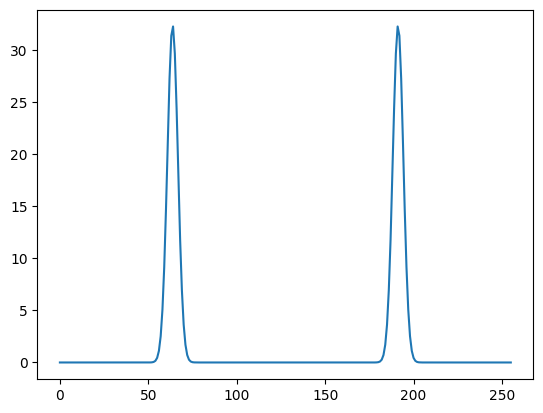

In [6]:
plt.figure() 
plt.plot(g.gpeobj.Vbox[len(g.gpeobj.Vbox)//2])
#plt.colorbar() 
plt.show() 

In [9]:
print(g.gpeobj.Vbox.nbytes)

NameError: name 'g' is not defined

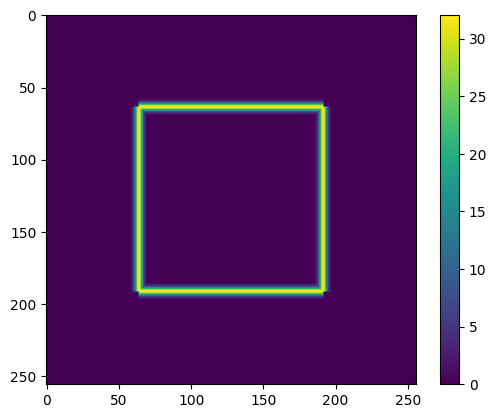

In [4]:
plt.figure() 
plt.imshow(g.gpeobj.Vbox)
plt.colorbar() 

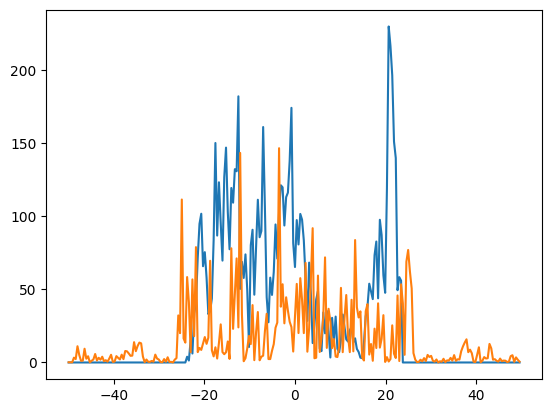

In [8]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2)
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[-1])//2])**2)

In [9]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift

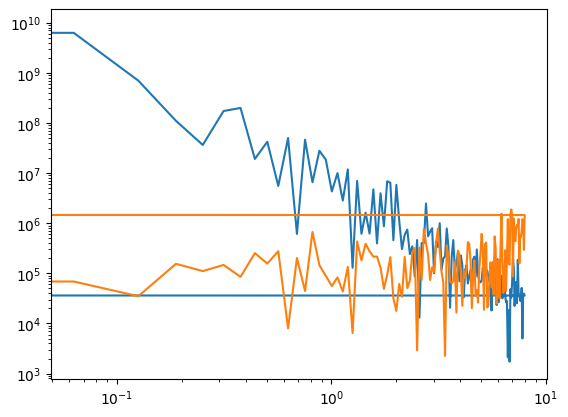

In [14]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2)
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1])[0])**2)
plt.yscale('log')
plt.xscale('log')

In [7]:
print(100/g.gpeobj.dt)

1310720.0


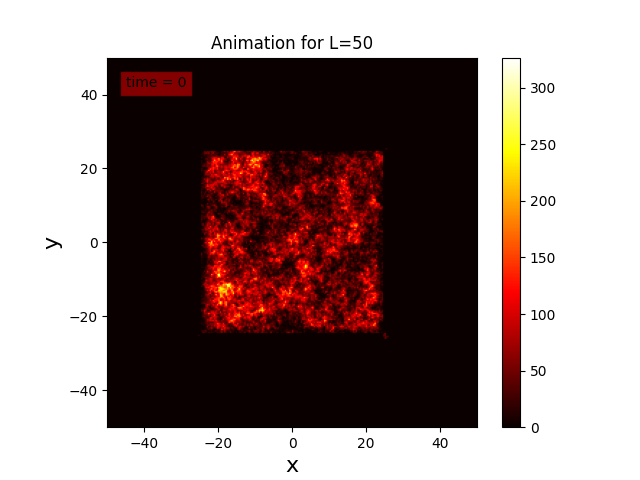

In [3]:
%matplotlib widget 
g.animatepsi2d('test_box.mp4')